<a href="https://colab.research.google.com/github/kuresh02/Hotel_Booking_EDA/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


# Importing_Libraries

In [ ]:

# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import folium
import plotly.express as px
#It is a magic function that renders the figure in a notebook
%matplotlib inline 

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

# Mounting_Drive

In [ ]:
#mounting driver from google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Csv_File_Location

In [ ]:
#csv file location
data_file_path="/content/drive/MyDrive/Capstone_Project/Capstone_Project_01_Exploratory Data Analysis/Project_Colab_NoteBook_&_Data/Data/Hotel Bookings.csv"


# Reading_Data_From_Csv_File

In [ ]:
# reading csv file

df= pd.read_csv(data_file_path)   
df.shape # understanding the total row and column by size

(119390, 32)

# Checking_Data_Frame_Shape(Row and Columns)

In [ ]:
#checking the number of rows and column numbers
print(type(df))
print(f' Our DataFrame have total {df.shape[0]} of rows.')
print(f' Our DataFrame have total {df.shape[1]} of columns.')

<class 'pandas.core.frame.DataFrame'>
 Our DataFrame have total 119390 of rows.
 Our DataFrame have total 32 of columns.


# DataFrame_Exploration

### Checking_1st_five_row

In [ ]:
# Checking first 5 rows
df.head() # by default it show 5 number of row data

### Checking_last_five_row

In [ ]:
# Checking last 5 rows
df.tail() # by default it show 5 number of row data

### Summary_statistics_of_the_Series_or_Dataframe

In [ ]:
#Showing at the min, max values,mean values etc for each and every columns. 
df.describe(include='all') # NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.

### Column_with_data_types_with_non_null_entries

In [ ]:
df.info()

## ------------------Finding_Name_Of_Column-----------------------

In [ ]:
#Create a new copy of dataframe
df_copy=df.copy()
#print the dataframe Column
print(list(df_copy.columns))


['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


### 1) We have to understand what are the  column present in our dataframe
### 2) From that we can easy understand about our data dataframe by see unique value by every individual.

### Types_Of_Hotel

In [ ]:
# types of hotel
df_copy['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

### Canceled_Types

In [ ]:
# canceled or not 
df_copy['is_canceled'].unique()

array([0, 1])

### Arrival_Date_Year

In [ ]:
# arrival date years
df_copy['arrival_date_year'].unique()

array([2015, 2016, 2017])

### Meal_Type

In [ ]:
# types of meal 
df_copy['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

### Country_Name

In [ ]:
# types of country 
df_copy['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

### Types_Of_Market_Sagment

In [ ]:
# types of market_segment 
df_copy['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

### Types_Of_Distrubution_Channel

In [ ]:
# types of distribution_channel 
df_copy['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

### Types_Of_Rooms

In [ ]:
# types of reserved_room_type 
first_set=set(df_copy['reserved_room_type'].unique()) # types of reserved_room_type 

second_set=set(df_copy['assigned_room_type'].unique()) # types of assigned_room_type 

Total_room_type=first_set.union(second_set) 
print(sorted(Total_room_type)) #types of room preset for Hotel Booking

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']


### Deposit_Type

In [ ]:
# types of deposit_type available
(df_copy['deposit_type'].unique()) # types of deposit_type 

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

### Distribution_Channel_Type

In [ ]:
# types of distribution_channel available

df_copy['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

# Clearing Data Process

###The most important steps before going for the  EDA(Exploratory Data Analysis)
###As we know clearing data will remove the conflict between any duplicate data/row.
##We have to do the above data cleaning process through the following steps:-
###1) Remove all duplicate rows.
###2) Missing values finding and replacing with proper values
###3) Change required column data types from string to appropriate datatypes.
###4)  Adding some required new columns.

## Step 1---> Remove all duplicate rows.

In [ ]:
#total number to duplicated rows and number of columns present in dataframe
df_duplicate_value=(df_copy[df_copy.duplicated()].shape)
print(df_duplicate_value)



(31994, 32)


In [ ]:
# checking for the duplicate rows
df_copy.duplicated().value_counts()   #true means duplicate rows

False    87396
True     31994
dtype: int64

Duplicate Row Number 31994


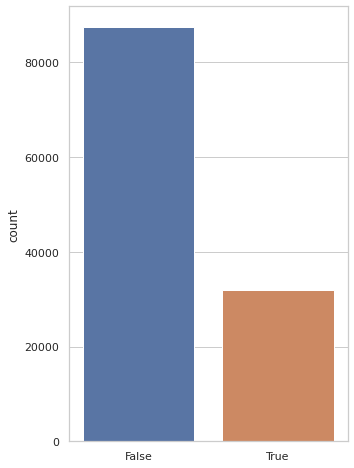

In [ ]:
# Plot a graph with respect to duplicate value
plt.figure(figsize=(5,8))

sns.set_theme(style="whitegrid")
sns.countplot(x=df_copy.duplicated())

no_of_duplicate_row=(df_duplicate_value[0])
print(f"Duplicate Row Number {no_of_duplicate_row}")


So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data by drop the row 

In [ ]:
# Dropping the duplicate values
df_copy.drop_duplicates(inplace = True)

In [ ]:
# New row size after drop of duplicate row
df_copy.shape

(87396, 32)

## Step 2---> Missing values finding and replacing with proper values.

In [ ]:
## Check any Null value present in columns
df_copy.isnull().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

In [ ]:
# graphical heat map for all null value in column

plt.figure(figsize=(24,10))
sns.heatmap(df_copy.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

## 1) From above data  we can clearly mark that some people who book rooms are not depends upon any agent or company fpr their booking room.
## 2) Here  only 4 Columns have Null value so to make this data a meaning full values we have to remove the Null value  there and replace with 0.


In [ ]:
# replacing Nan to 0
df_copy = df_copy.replace(np.NaN, 0)
df_copy.isnull().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',int(0):'Null values'})
df_copy.head(5)


## Step 3---> Change required column data types from string to appropriate datatypes.

In [ ]:
# Change  datatype of columns 'children', 'company' and 'agent' from float to int.
df_copy[['children', 'agent', 'company']] = df_copy[['children', 'agent','company']].astype('int64')
df_copy["reservation_status_date"]=pd.to_datetime(df_copy["reservation_status_date"], format = '%Y-%m-%d')
# df_copy['reservation_status_date']=pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

## Step 4--->Adding some required new columns.

## New Column for Total_Day

In [ ]:
# total days staying in hotels
df_copy['total_day'] = (df_copy['stays_in_weekend_nights']+df_copy['stays_in_week_nights'])



### New Column for Total_People

In [ ]:
# Adding total people total_people = num of adults + children + babies
df_copy['total_people'] = df_copy['adults']+df_copy['children']+df_copy['babies']
print(df_copy['total_people'])

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_people, Length: 119390, dtype: float64


# EDA----->(Exploratory_Data_Analysis)

# 1) Which Year most room booking happen?

In [ ]:
# return highest bookings made in a year
highest_bookings= df_copy.groupby(['arrival_date_year'])['arrival_date_year'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)
# bookings made in a year
top_ten_highest_bookings=highest_bookings[:]
top_ten_highest_bookings

,arrival_date_year,Most_Bookings
1,2016,56707
2,2017,40687
0,2015,21996


### Visualizing_by_plotting_graph

Text(0.5, 1.0, 'Year wise Booking')

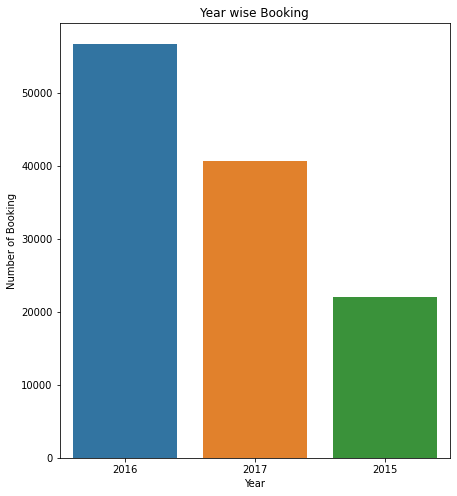

In [ ]:
#set plotsize
plt.figure(figsize=(7,8))
#plotting of bar
sns.countplot(x=df_copy['arrival_date_year'],order=df_copy['arrival_date_year'].value_counts().index)
#  set x-label in plot
plt.xlabel('Year')
# set y-label in the plot
plt.ylabel('Number of Booking')
# set title for the plot
plt.title("Year wise Booking")

This graph represent above analysis and giving information that in 2016 highest number(56,707) of room booking happen and in 2015 lowest number(21,996) of booking happen.
### New Section

## Observation from the Graph 
### In the year 2016 Most number of Booking happend in Hotels.

# 2) Country With Highest Number of Booking

In [ ]:
# return highest bookings made in a year
country_list= df_copy.groupby(['country'])['country'].agg({'count'}).reset_index().rename(columns={'index': "country" }).sort_values(by='count',ascending=False)
country_list.drop(country_list[country_list['country']==0].index,inplace=True) 
country_list=country_list[:20]
country_list

,country,count
135,PRT,48590
59,GBR,12129
56,FRA,10415
51,ESP,8568
43,DEU,7287
81,ITA,3766
76,IRL,3375
15,BEL,2342
25,BRA,2224
123,NLD,2104


### plotting graph again with values 

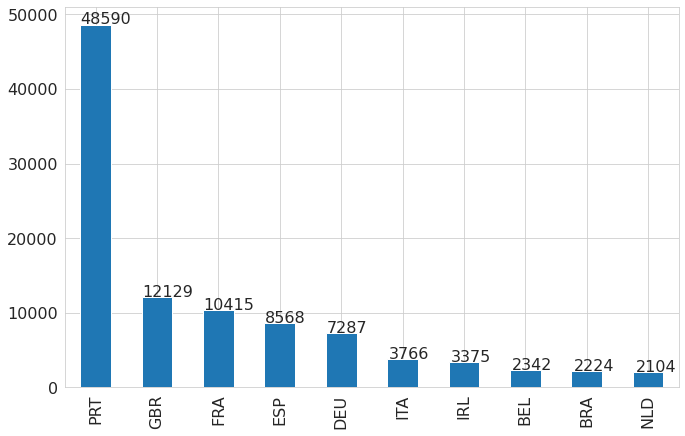

In [ ]:
ax= df.country.value_counts().head(10).plot (kind= 'bar');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Visualizing_by_plotting_graph

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

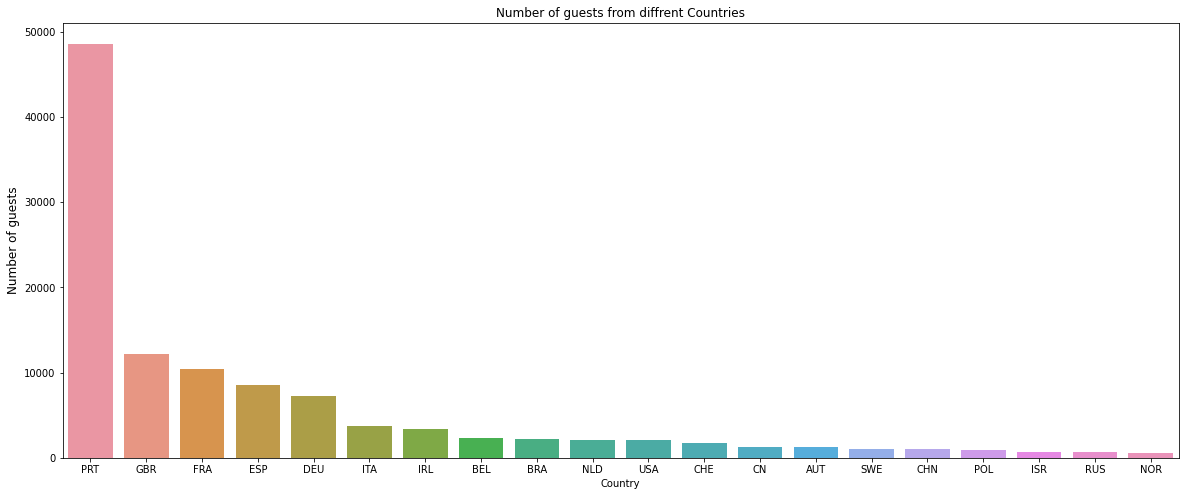

In [ ]:
# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_list['country'],y=country_list['count'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

Form the above graph it is clearly showing that high number of booking happen in Portugal, Great Britain, France, Spain etc country. 
It show that as compare to any country Portugal has the highest booking number(48590). More than four times as compare to 2nd highest Great Britain(12129).


# 3) Map wise room booking density graph

In [ ]:
import folium                               
import plotly.express as px
# searched on google 
plt.figure(figsize = (18,12))
basemap = folium.Map()
guests_map = px.choropleth(country_list, locations = country_list['country'],color = country_list['count'], hover_name = country_list['country'])
guests_map.show()

<Figure size 1296x864 with 0 Axes>

Map wise room booking density in World.
Form the above map it is clearly showing that high number of booking happen in Westen Europe country. 

# 4) Which type of Hotel has highest number of booking?

In [ ]:
# return highest bookings made in a year
Hotel_list= df_copy.groupby(['hotel'])['hotel'].agg({'count'}).reset_index().rename(columns={'index': "Serial" }).sort_values(by='count',ascending=False)
# country_list.drop(country_list[country_list['country']==0].index,inplace=True) 
# country_list=country_list[:20]
print(Hotel_list)

          hotel  count
0    City Hotel  79330
1  Resort Hotel  40060


### Visualizing_by_plotting_graph

Text(0.5, 1.0, 'Hotel types with number of booking')

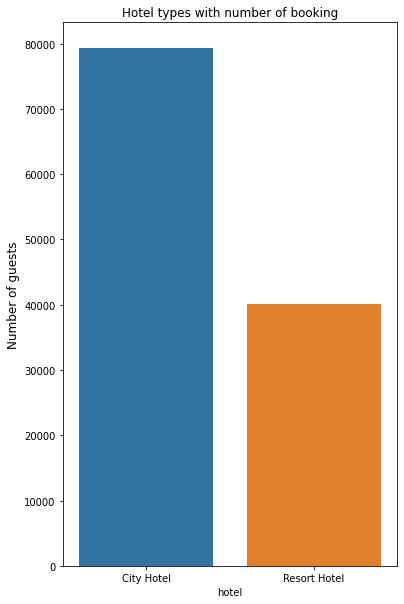

In [ ]:

# Visualizing by  plotting the graph
plt.figure(figsize=(6,10))
sns.barplot(x=Hotel_list['hotel'],y=Hotel_list['count'])
plt.xlabel('hotel')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Hotel types with number of booking")

Our Data frame has 2 types of hotel data is present, so from the give data we can do a analysis on highest number of booking in which type of hotel.
This graph represent two type of hotel type like City Hotel and Resort Hotel.
Here we can clearly get an idea that Number of guests in City Hotel are more as compare to Resort Hotel	


# 5. Which room type booked in highest Number?


In [ ]:
# return highest bookings made in a year
bookings_room= df_copy.groupby(['reserved_room_type'])['reserved_room_type'].agg({'count'}).reset_index().rename(columns={'count': "No_of_Bookings" })
# bookings made in a year
booking_room_type=bookings_room[:]
booking_room_type



,reserved_room_type,No_of_Bookings
0,A,85994
1,B,1118
2,C,932
3,D,19201
4,E,6535
5,F,2897
6,G,2094
7,H,601
8,L,6
9,P,12


## Highest Number of room type booked in %

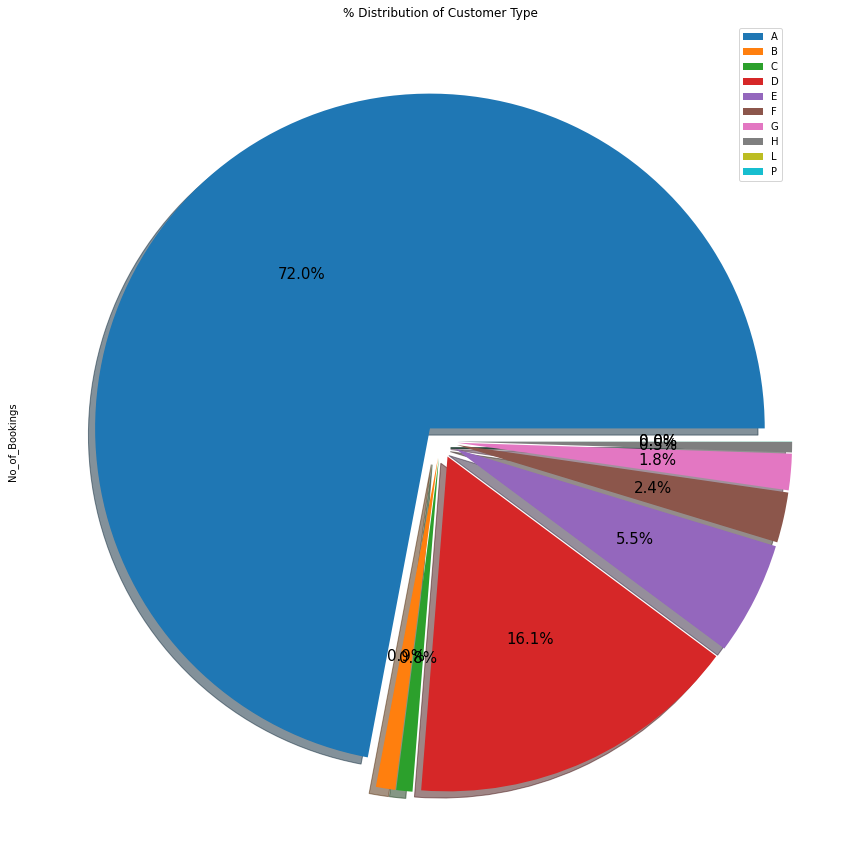

In [ ]:
booking_room_type['No_of_Bookings'].plot.pie(explode=[0.05]*10,shadow=True,autopct='%1.1f%%',figsize=(15,20),fontsize=15,labels=None)
labels1=booking_room_type['reserved_room_type'].value_counts().index.tolist()
labels=booking_room_type['No_of_Bookings'].value_counts().index.tolist()
Lab3=(labels1+labels)
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels1)





There are 10 types of room are present in hotels.
Out of that most room are from type ‘A’ or type ‘D’ types.
‘A’ type room has the highest reserved room booking type having 56552 number.

# 6) Number of room booking by top 10 Agent

In [ ]:
# return highest bookings made in a year
agent_no= df_copy.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "No_of_Bookings" }).sort_values(by='No_of_Bookings',ascending=False)
# bookings made in a year
booking_by_agent=agent_no.iloc[0:20].sort_values(by='agent',ascending=True)
booking_by_agent



,agent,No_of_Bookings
0,1.0,7191
2,3.0,1336
5,6.0,3290
6,7.0,3539
7,8.0,1514
8,9.0,31961
13,14.0,3640
17,19.0,1061
19,21.0,875
26,28.0,1666


In this analysis we finding top 10 agent having highest number of booking. Here in this graph, we can clearly see that mostly 3 agent have done most of the booking. 
Agent id- 9.0 have done highest number of booking.


## Visualizing by  plotting the graph

Text(0.5, 1.0, 'Number of Room Booking by top 10 agent')

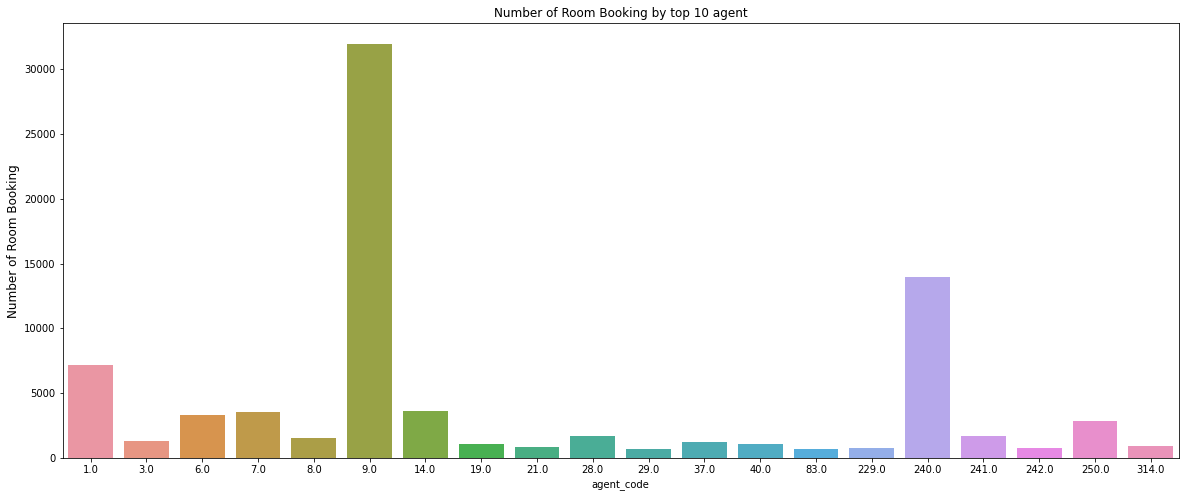

In [ ]:
# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=booking_by_agent["agent"],y=booking_by_agent['No_of_Bookings'])
plt.xlabel('agent_code')
plt.ylabel('Number of Room Booking',fontsize=12)
plt.title("Number of Room Booking by top 10 agent")

# 7) which room type generates highest adr?

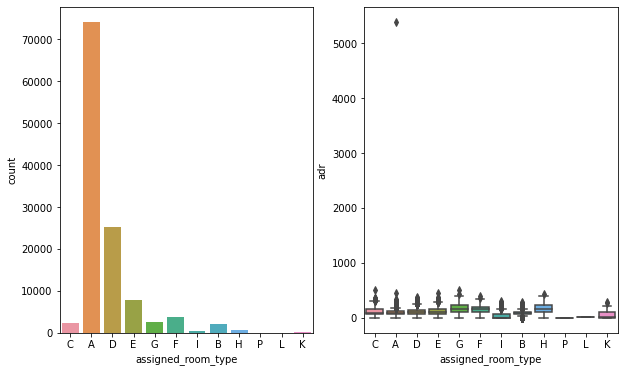

In [ ]:
#plot Box & ploat graph for analysis data on highest adr
fig, axes = plt.subplots(1, 2, figsize=(10,6))
grp_by_room = df_copy.groupby('assigned_room_type')
sns.countplot(ax = axes[0], x = df_copy['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df_copy['assigned_room_type'], y = df_copy['adr'])
plt.show()

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximize revenue.


# 8) Find is the most common market_segment prefer to booking hotels?

In [ ]:
#most common market_segment prefer to booking hotels
group_by_dc = df_copy.groupby('market_segment')
market_segment = pd.DataFrame(round((group_by_dc.size()/df_copy.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
print(market_segment)
#ploting pia chart for  variours market segment
plt.figure(figsize = (18,12))
data = market_segment['Booking_%']
labels = market_segment['market_segment']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*8, labels=labels, pctdistance=0.5)
plt.title("Booking % through market_segment", fontsize=14);

Market segment is well distributed between various segment.  Here in this dada analysis we can clearly say that aviation and online TA has very less share in booking hotel rooms.
